# 主観ポジショニング

In [1]:
import os
os.makedirs('out', exist_ok=True)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [2]:
#!pip install japanize_matplotlib

## Google Colabを利用する場合に以下のコマンドでGoogle Driveをマウント
#from google.colab import drive
#drive.mount('/content/drive')

## データフレームへの読み込み
## Google DriveのColab Notebooksにダウンロードしたフォルダ(marketing)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_6/in/'
#iFile=iPath+'sec6-2data.csv'

## 主観ポジショニング
#import pandas as pd
#import matplotlib.pyplot as plt

## データの読み込み
#df_position_org = pd.read_csv(iFile)

In [3]:
# 主観ポジショニング
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
df_position_org = pd.read_csv('in/sec6-2data.csv')

In [4]:
# x軸とｙ軸のための集計
pt_position_x = pd.pivot_table(df_position_org,
                               values='購入数量',
                               index='店舗',
                               columns='中分類名',
                               aggfunc='sum'
                               )
pt_position_y = pd.pivot_table(df_position_org,
                               values='購入数量',
                               index='店舗',
                               columns='曜日',
                               aggfunc='sum'
                               )

# それぞれの比率の算出
x = pt_position_x['生鮮食品']/pt_position_x.sum(axis=1)
y = (pt_position_y['土']+pt_position_y['日'])/pt_position_y.sum(axis=1)

# 集計データの結合
xy = pd.concat([x, y], axis=1)
xy.columns = ['生鮮食品比率', '土日比率']

# パーセント表示のための設定
pd.options.display.float_format = '{: <10.1%}'.format

# 結果の出力
xy

,生鮮食品比率,土日比率
店舗,,
A,9.6%,38.6%
B,7.8%,38.7%
C,10.9%,38.4%
D,8.7%,38.0%
E,13.4%,29.0%
F,16.7%,39.4%
G,9.7%,36.3%
H,10.8%,40.3%
I,8.0%,26.9%


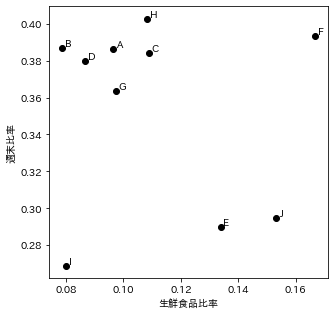

In [5]:
# 日本語設定
import japanize_matplotlib

# 散布図作成
plt.figure(figsize=[5, 5])
plt.scatter(x, y, color='black')
plt.xlabel('生鮮食品比率')
plt.ylabel('週末比率')
for i, j in xy.iterrows():
    plt.annotate(i, xy=(j[0]+0.001, j[1]+0.001))

#plt.savefig('out/sub_positioning.eps', bbox_inches='tight',dpi=600)

例題6.17

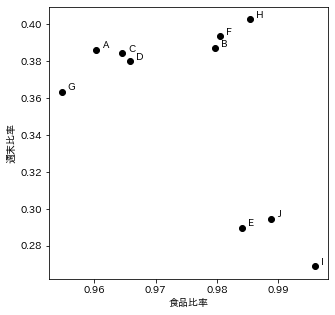

In [6]:
# x軸とｙ軸のための集計
pt_position_x = pd.pivot_table(df_position_org,
                               values='購入数量',
                               index='店舗',
                               columns='大分類名',
                               aggfunc='sum'
                               )
pt_position_y = pd.pivot_table(df_position_org,
                               values='購入数量',
                               index='店舗',
                               columns='曜日',
                               aggfunc='sum'
                               )

# それぞれの比率の算出
x = pt_position_x['食品']/pt_position_x.sum(axis=1)
y = (pt_position_y['土']+pt_position_y['日'])/pt_position_y.sum(axis=1)

# 集計データの結合
xy = pd.concat([x, y], axis=1)
xy.columns = ['食品比率', '土日比率']

# パーセント表示のための設定
pd.options.display.float_format = '{: <10.1%}'.format

# 散布図作成
plt.figure(figsize=[5, 5])
plt.scatter(x, y, color='black')
plt.xlabel('食品比率')
plt.ylabel('週末比率')
for i, j in xy.iterrows():
    plt.annotate(i, xy=(j[0]+0.001, j[1]+0.001))

#plt.savefig('out/sub_positioning(daibunrui).eps', bbox_inches='tight', dpi=600)

主成分分析によるポジショニング

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 主成分分析のためのライブラリ
from sklearn.decomposition import PCA

# データ標準化のためのライブラリ
from sklearn.preprocessing import StandardScaler

In [8]:
# データの読み込み
#df_position_org = pd.read_csv(iFile) # Google Colab
#df_position_org = pd.read_csv('in/sec6-2data.csv')

# 曜日別の売上金額の集計と構成比率の計算
df_pca_day = pd.pivot_table(df_position_org,
                            values='金額',
                            index='店舗',
                            columns='曜日',
                            aggfunc='sum'
                            )
df_pca_day = df_pca_day.apply(lambda x: x/sum(x), axis=1)

# 子供の有無の平均の集計
df_pca_child_groupby = df_position_org.groupby('店舗')

df_pca_child = df_pca_child_groupby.agg(
    {'乳幼児有無': 'mean', '小学生有無': 'mean', '中高生有無': 'mean'})
# データの結合
df_pca = pd.concat([df_pca_day, df_pca_child], axis=1)

In [9]:
df_pca

,土,日,月,木,水,火,金,乳幼児有無,小学生有無,中高生有無
店舗,,,,,,,,,,
A,20.8%,20.3%,10.4%,7.9%,9.2%,21.4%,10.0%,11.4%,11.1%,8.6%
B,18.9%,20.7%,13.9%,12.0%,11.5%,10.9%,12.1%,13.2%,12.6%,17.4%
C,19.0%,21.4%,13.9%,10.9%,13.6%,10.2%,11.0%,16.5%,12.7%,13.6%
D,18.2%,19.7%,13.7%,11.3%,10.1%,15.1%,11.8%,14.1%,18.0%,18.3%
E,17.3%,12.6%,12.3%,10.1%,27.7%,9.2%,10.7%,9.2%,11.3%,22.4%
F,20.2%,23.8%,13.4%,8.1%,14.3%,9.7%,10.5%,17.8%,16.8%,12.2%
G,9.7%,25.9%,7.6%,34.2%,6.4%,7.9%,8.3%,6.6%,11.9%,18.9%
H,18.1%,25.1%,11.8%,8.0%,9.9%,14.5%,12.5%,7.3%,8.6%,16.3%
I,14.8%,13.9%,13.7%,12.2%,16.5%,14.7%,14.3%,15.1%,8.0%,15.5%


In [10]:
# 標準化
scaler = StandardScaler()
pca_sc = scaler.fit_transform(df_pca)

# 主成分分析の実行
pca_model = PCA(n_components=3)
pca_res = pca_model.fit(pca_sc)

# 主成分負荷量
loading = pd.DataFrame(pca_res.components_.T)
loading.index = df_pca.columns
loading.columns = ['第1主成分', '第2主成分', '第3主成分']

# 主成分得点
score = pd.DataFrame(pca_res.fit_transform(pca_sc))
#score = pd.DataFrame(pca_res.fit_transform(df_pca.values))
score.index = df_pca.index
score.columns = ['第1主成分', '第2主成分', '第3主成分']

# 寄与率
cont_ratio = pd.DataFrame(pca_res.explained_variance_ratio_)
cum_ratio = pd.DataFrame(np.cumsum(pca_res.explained_variance_ratio_))
ratio = pd.concat([cont_ratio, cum_ratio], axis=1).T
ratio.columns = ['第1主成分', '第2主成分', '第3主成分']
ratio.index = ['寄与率', '累積寄与率']

In [11]:
loading

,第1主成分,第2主成分,第3主成分
土,-37.4%,-38.8%,-9.6%
日,30.2%,-32.1%,-33.1%
月,-45.9%,0.6%,12.2%
木,50.0%,10.6%,6.6%
水,-23.8%,14.4%,53.5%
火,-23.1%,6.0%,-48.5%
金,-33.2%,40.2%,-7.8%
乳幼児有無,-22.9%,-46.7%,12.6%
小学生有無,2.7%,-57.4%,15.1%
中高生有無,18.6%,-4.2%,54.4%


In [12]:
score

,第1主成分,第2主成分,第3主成分
店舗,,,
A,-62.2%,-68.5%,-261.0%
B,-40.7%,-63.3%,40.5%
C,-63.3%,-122.5%,27.4%
D,-53.3%,-146.0%,18.3%
E,-49.6%,87.5%,327.3%
F,-71.8%,-244.6%,16.4%
G,545.2%,26.0%,10.3%
H,22.3%,47.7%,-120.0%
I,-137.1%,159.7%,56.1%


In [13]:
pd.options.display.float_format = '{: <10.1%}'.format
ratio

,第1主成分,第2主成分,第3主成分
寄与率,34.4%,24.6%,20.9%
累積寄与率,34.4%,59.0%,80.0%


In [14]:
pd.options.display.float_format = None

In [15]:
# 日本語設定
import japanize_matplotlib

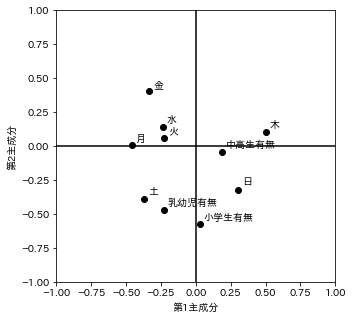

In [16]:
# 主成分負荷量のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(loading.values[:, 0], loading.values[:, 1], color='black')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
for i, j in loading.iterrows():
    plt.annotate(i, xy=(j[0]+0.03, j[1]+0.03))

#plt.savefig('out/pca_loading12.eps', bbox_inches='tight', dpi=600)

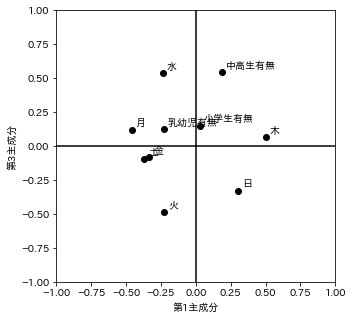

In [17]:
# 主成分負荷量のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(loading.values[:, 0], loading.values[:, 2], color='black')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第3主成分')
for i, j in loading.iterrows():
    plt.annotate(i, xy=(j[0]+0.03, j[2]+0.03))

#plt.savefig('out/pca_loading13.eps', bbox_inches='tight', dpi=600)

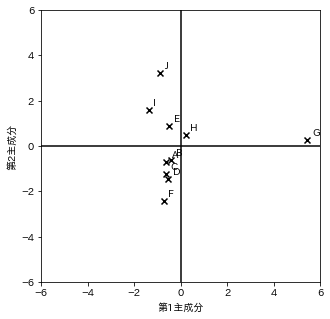

In [18]:
# 主成分得点のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(score.values[:, 0], score.values[:, 1], c='black', marker="x")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
for i, j in score.iterrows():
    plt.annotate(i, xy=(j[0]+0.2, j[1]+0.2))

#plt.savefig('out/pca_score12.eps', bbox_inches='tight', dpi=600)

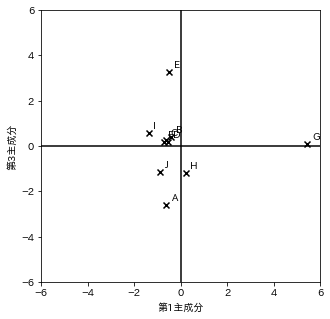

In [17]:
# 主成分得点のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(score.values[:, 0], score.values[:, 2], c='black', marker="x")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第3主成分')
for i, j in score.iterrows():
    plt.annotate(i, xy=(j[0]+0.2, j[2]+0.2))

#plt.savefig('out/pca_score13.eps', bbox_inches='tight', dpi=600)

例題6.18

In [19]:
# 中分類別の売上金額の集計と構成比率の計算
df_ex = pd.pivot_table(df_position_org,
                       values='金額',
                       index='店舗',
                       columns='中分類名',
                       aggfunc='sum'
                       )
# 標準化
scaler = StandardScaler()
df_ex2 = df_ex.apply(lambda x: x/sum(x), axis=1)

pca_sc = scaler.fit_transform(df_ex2)

# 主成分分析の実行
pca_model = PCA(n_components=3)
pca_res = pca_model.fit(pca_sc)

# 主成分負荷量
loading = pd.DataFrame(pca_res.components_.T)
loading.index = df_ex.columns
loading.columns = ['第1主成分', '第2主成分', '第3主成分']

# 主成分得点
score = pd.DataFrame(pca_res.fit_transform(pca_sc))
score.index = df_ex.index
score.columns = ['第1主成分', '第2主成分', '第3主成分']

# 寄与率
cont_ratio = pd.DataFrame(pca_res.explained_variance_ratio_)
cum_ratio = pd.DataFrame(np.cumsum(pca_res.explained_variance_ratio_))
ratio = pd.concat([cont_ratio, cum_ratio], axis=1).T
ratio.columns = ['第1主成分', '第2主成分', '第3主成分']
ratio.index = ['寄与率', '累積寄与率']

In [20]:
df_ex2

中分類名,加工食品,日用雑貨,生鮮食品,菓子類,飲料・酒類
店舗,,,,,
A,0.447988,0.065789,0.070706,0.151174,0.264343
B,0.484281,0.033221,0.060743,0.165913,0.255842
C,0.511127,0.051402,0.084704,0.153810,0.198957
D,0.466218,0.053844,0.066543,0.158592,0.254804
E,0.493090,0.022287,0.109456,0.167606,0.207560
F,0.407395,0.029839,0.135436,0.120070,0.307260
G,0.420329,0.067124,0.168745,0.137931,0.205871
H,0.502172,0.022319,0.077030,0.157348,0.241131
I,0.399867,0.004652,0.063982,0.212441,0.319059


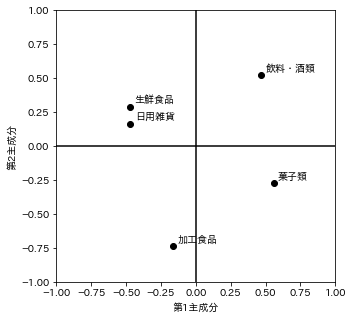

In [23]:
# 主成分負荷量のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(loading.values[:, 0], loading.values[:, 1], color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
for i, j in loading.iterrows():
    plt.annotate(i, xy=(j[0]+0.03, j[1]+0.03))

#plt.savefig('out/chuubunrui_pca_loading12.eps', bbox_inches='tight', dpi=600)

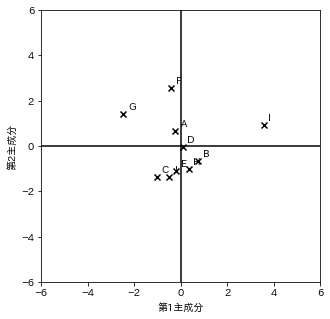

In [24]:
# 主成分得点のグラフ（前者が横軸，後者が縦軸）
plt.figure(figsize=(5, 5))
plt.scatter(score.values[:, 0], score.values[:, 1], color='k', marker="x")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
for i, j in score.iterrows():
    plt.annotate(i, xy=(j[0]+0.2, j[1]+0.2))

#plt.savefig('out/chuubunrui_pca_score12.eps', bbox_inches='tight',dpi=600)

対応分析

In [25]:
# mcaのインストール (インストールされていない場合は以下を実行）
# !pip install mca

In [26]:
# コレスポンデンス分析
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mca

In [27]:
# データの読み込み
#df_position_org = pd.read_csv(iFile) # Google Colab
#df_position_org = pd.read_csv('in/sec6-2data.csv')

# 小分類の購入数量を店舗ごとに集計
pt_cross_org = pd.pivot_table(df_position_org,
                              values='購入数量',
                              index='小分類名',
                              columns='店舗',
                              aggfunc='sum'
                              )

# 該当なしに0.を代入
pt_cross_org.fillna(0.)

# 各行の合計を計算し降順に並び替え，上位店舗を抽出
pt_cross_org['合計'] = pt_cross_org.sum(axis=1)
pt_cross_org = pt_cross_org.sort_values('合計', ascending=False)
df_corresp = pt_cross_org.iloc[:11, :10]

# 結果の出力
pd.options.display.precision = 0
df_corresp

店舗,A,B,C,D,E,F,G,H,I,J
小分類名,,,,,,,,,,
菓子,6062,3260,6682,16332,5369,1802,4056,3600,3711,3768
農産,4521,1793,6352,11664,5530,3423,3131,3163,2028,4452
清涼飲料,5116,2701,3523,12546,2883,1196,2606,3229,3670,2178
パン・シリアル類,4918,2154,5331,9164,3725,1519,3510,2427,2702,2780
水物,2955,1408,4185,8446,3192,1349,2179,2573,1179,2159
デザート・ヨーグルト,2979,1607,4057,8304,3209,1136,2303,1711,1091,1526
麺類,3165,1745,2731,8008,2383,1020,2833,2016,1804,1693
乳飲料,2682,1355,3274,6788,3225,1226,1853,1334,1430,1039
冷凍食品,2697,1492,3957,9422,2129,464,904,1327,724,839


In [28]:
# 対応分析の実行
mca_result = mca.MCA(df_corresp, benzecri=False)
# 結果
result_r = pd.DataFrame(mca_result.fs_r(N=2))
result_c = pd.DataFrame(mca_result.fs_c(N=2))
result_r.index = df_corresp.index
result_c.index = df_corresp.columns

contribution = pd.DataFrame(mca_result.expl_var(greenacre=False, N=2)).T
cum_contribution = pd.DataFrame(
    np.cumsum(mca_result.expl_var(greenacre=False, N=2))).T
contribution_ratio = pd.concat([contribution, cum_contribution], axis=0)
contribution_ratio.index = ['寄与率', '累積寄与率']

In [29]:
pd.options.display.precision = 6
result_r

,0,1
小分類名,,
菓子,-0.048589,0.000444
農産,0.218683,0.069413
清涼飲料,-0.214549,0.061509
パン・シリアル類,0.010317,0.065092
水物,0.093055,-0.044971
デザート・ヨーグルト,0.053676,-0.096727
麺類,-0.078519,0.052117
乳飲料,0.043868,-0.039304
冷凍食品,-0.085231,-0.302809


In [30]:
result_c

,0,1
店舗,,
A,-0.065293,-0.002311
B,-0.144860,-0.004044
C,0.102981,-0.111405
D,-0.069669,-0.078816
E,0.150086,-0.053400
F,0.249654,0.216406
G,0.017136,0.088540
H,-0.009891,0.018957
I,-0.233664,0.254179


In [31]:
pd.options.display.float_format = '{: <10.1%}'.format
contribution_ratio

,0,1
寄与率,38.8%,32.2%
累積寄与率,38.8%,71.0%


In [32]:
pd.options.display.float_format = None

Text(0, 0.5, '第2軸')

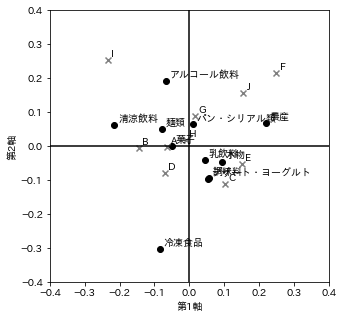

In [33]:
# 日本語環境
import japanize_matplotlib

# 散布図の設定
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)

# 行スコア
plt.scatter(result_r[0].values, result_r[1].values, marker='o', color='black')
for i, j in result_r.iterrows():
    ax.annotate(i, xy=(j[0]+0.01, j[1]+0.01))

# 列スコア
plt.scatter(result_c[0].values, result_c[1].values, marker='x', color='gray')
for i, j in result_c.iterrows():
    ax.annotate(i, xy=(j[0]+0.01, j[1]+0.01))

# 軸と軸ラベルの表示
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1軸')
plt.ylabel('第2軸')

#plt.savefig('out/corresp_result.eps', bbox_inches='tight', dpi=600)

例題6.19

              0         1         2
寄与率    0.388151  0.321924  0.133790
累積寄与率  0.388151  0.710075  0.843865


Text(0, 0.5, '第3軸')

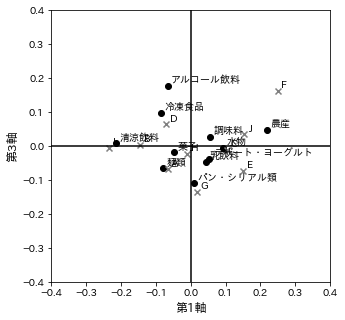

In [34]:
# 対応分析の実行
mca_result = mca.MCA(df_corresp, benzecri=False)
# 結果
result_r = pd.DataFrame(mca_result.fs_r(N=3))
result_c = pd.DataFrame(mca_result.fs_c(N=3))
result_r.index = df_corresp.index
result_c.index = df_corresp.columns

contribution = pd.DataFrame(mca_result.expl_var(greenacre=False, N=3)).T
cum_contribution = pd.DataFrame(
    np.cumsum(mca_result.expl_var(greenacre=False, N=3))).T
contribution_ratio = pd.concat([contribution, cum_contribution], axis=0)
contribution_ratio.index = ['寄与率', '累積寄与率']
print(contribution_ratio)

# 必要な列のみの抽出
result_r = result_r.iloc[:, [0, 2]]
result_c = result_c.iloc[:, [0, 2]]

# 散布図の設定
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)

# 行スコア
plt.scatter(result_r[0].values, result_r[2].values, marker='o', color='black')
for i, j in result_r.iterrows():
    ax.annotate(i, xy=(j[0]+0.01, j[2]+0.01))

# 列スコア
plt.scatter(result_c[0].values, result_c[2].values, marker='x', color='gray')
for i, j in result_c.iterrows():
    ax.annotate(i, xy=(j[0]+0.01, j[2]+0.01))

# 軸と軸ラベルの表示
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('第1軸', size=12)
plt.ylabel('第3軸', size=12)

#plt.savefig('out/corresp_result(ex).eps', bbox_inches='tight', dpi=600)